In [31]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [32]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [33]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [34]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=3, column='ABERTO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=4, column='FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=5, column='DS', value=(~pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=6, column='DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=7, column='VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=8, column='POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=9, column='DATA_NAO_FESTIVA', value=((~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos()))).astype(int))
df.insert(loc=10, column='FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=11, column='NAO_FERIADO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=12, column='SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=13, column='SEMANA_DE_NAO_PAGAMENTO', value=(~pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=14, column='BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=15, column='ALTA_TEMPORADA', value=(~pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=16, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=17, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=18, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=19, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('FECHADO == 0 and ABERTO == 1')
df = df.drop(columns=['FECHADO', 'ABERTO'])
df = df.query('VENDAS < 225')

In [35]:
pd.set_option('display.max_rows', 50)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 751
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     728 non-null    datetime64[ns]
 1   VENDAS                   728 non-null    int64         
 2   FDS                      728 non-null    int64         
 3   DS                       728 non-null    int64         
 4   DATA_FESTIVA             728 non-null    int64         
 5   VESPERA_DATA_FESTIVA     728 non-null    int64         
 6   POS_DATA_FESTIVA         728 non-null    int64         
 7   DATA_NAO_FESTIVA         728 non-null    int64         
 8   FERIADO                  728 non-null    int64         
 9   NAO_FERIADO              728 non-null    int64         
 10  SEMANA_PAGAMENTO         728 non-null    int64         
 11  SEMANA_DE_NAO_PAGAMENTO  728 non-null    int64         
 12  BAIXA_TEMPORADA          728 non-nul

In [37]:
df.describe()

,VENDAS,FDS,DS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,DATA_NAO_FESTIVA,FERIADO,NAO_FERIADO,SEMANA_PAGAMENTO,SEMANA_DE_NAO_PAGAMENTO,BAIXA_TEMPORADA,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,126.825549,0.282967,0.717033,0.004121,0.046703,0.030220,0.924451,0.021978,0.978022,0.304945,0.695055,0.178571,0.821429,10.038462,4.059890,26.128984,75.899382
std,24.881641,0.450750,0.450750,0.064106,0.211148,0.171309,0.264458,0.146712,0.146712,0.460701,0.460701,0.383256,0.383256,1.188507,9.903319,5.749055,10.502190
min,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,10.900000,48.750000
25%,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,22.200000,68.000000
50%,128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,26.600000,75.750000
75%,140.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,2.300000,30.100000,83.500000
max,224.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,79.400000,39.000000,97.000000


In [38]:
df.median()

VENDAS                     128.00
FDS                          0.00
DS                           1.00
DATA_FESTIVA                 0.00
VESPERA_DATA_FESTIVA         0.00
POS_DATA_FESTIVA             0.00
DATA_NAO_FESTIVA             1.00
FERIADO                      0.00
NAO_FERIADO                  1.00
SEMANA_PAGAMENTO             0.00
SEMANA_DE_NAO_PAGAMENTO      1.00
BAIXA_TEMPORADA              0.00
ALTA_TEMPORADA               1.00
QTD_CONCORRENTES            10.00
PRECIPITACAO                 0.00
TEMPERATURA                 26.60
UMIDADE                     75.75
dtype: float64

In [39]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


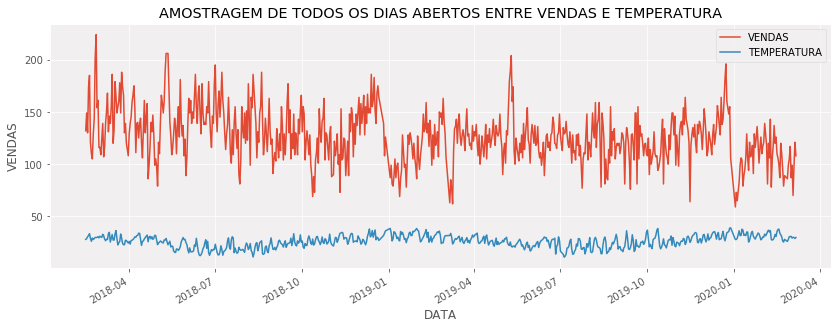

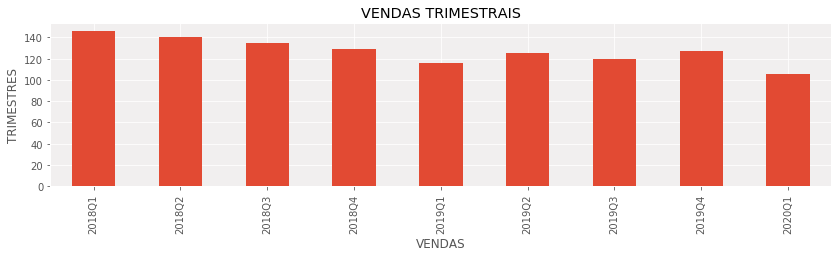

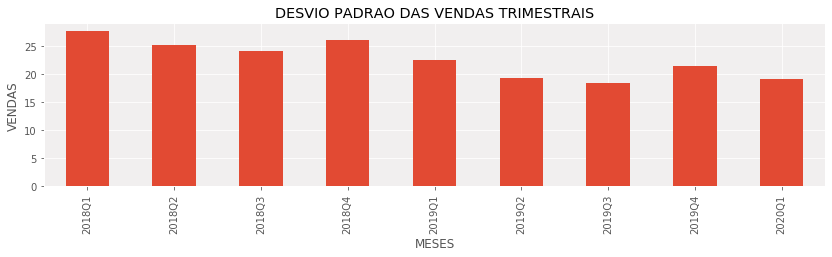

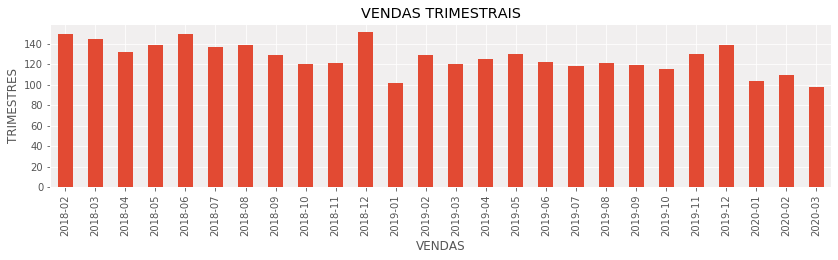

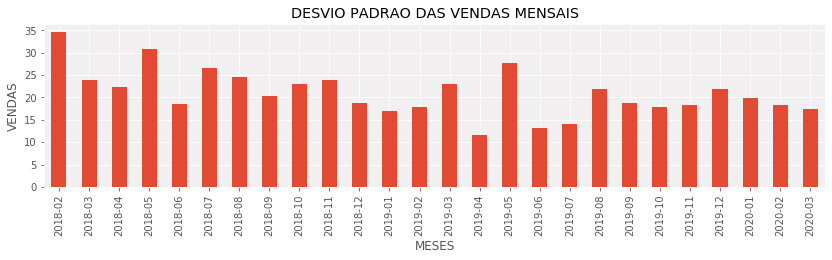

In [40]:
import matplotlib.style as style
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = '#F1EFEF'

ax = df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(14, 5))
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()    

df_quarter = pd.DataFrame({'DATA': pd.to_datetime(df['DATA']), 'TEMPERATURA': df['TEMPERATURA'], 'VENDAS': df['VENDAS']})

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

df_quarter.groupby(df['DATA'].dt.to_period('Q'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS TRIMESTRAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()

ax = df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('mean').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('VENDAS TRIMESTRAIS')
plt.xlabel('VENDAS')
plt.ylabel('TRIMESTRES')
plt.show()

mm = df_quarter.groupby(df['DATA'].dt.to_period('M'))['VENDAS'].agg('std').plot(y='VENDAS', x='DATA', kind='bar', figsize=(14, 3))
plt.title('DESVIO PADRAO DAS VENDAS MENSAIS')
plt.xlabel('MESES')
plt.ylabel('VENDAS')
plt.show()


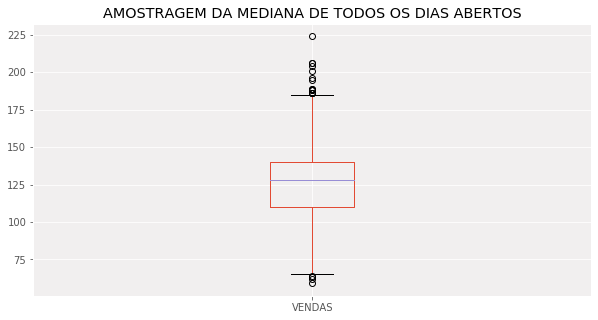

In [41]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

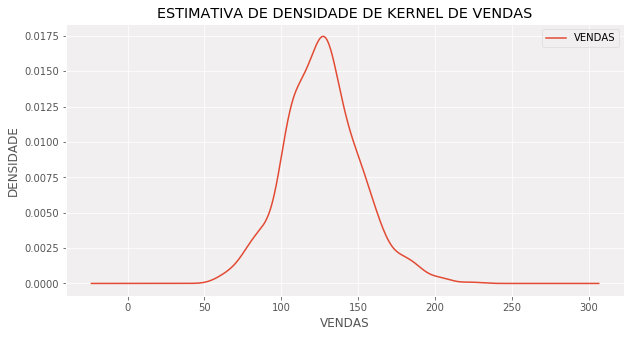

In [42]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

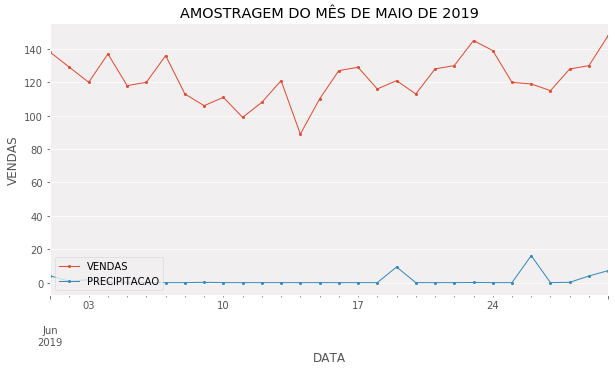

In [43]:
plt.rcParams['axes.facecolor'] = '#F1EFEF'
query = (df['DATA'] >= "2019-06-01") & (df['DATA'] <= "2019-06-30")
df2 = df.loc[query]
df2.sort_values(by=['DATA'], inplace=True, ascending=True)
df2.plot(y=['VENDAS', 'PRECIPITACAO'], x='DATA', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.legend(loc=3)
plt.title('AMOSTRAGEM DO MÊS DE MAIO DE 2019')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS', 'SEMANA_DE_NAO_PAGAMENTO', 'SEMANA_PAGAMENTO', 'FERIADO'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
y_train = np.array(y_train)
y_test = np.array(y_test)

#feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

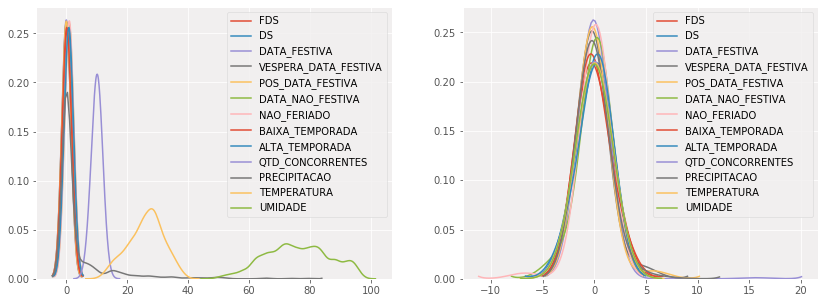

In [45]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#F1EFEF'

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=['FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'NAO_FERIADO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

sns.kdeplot(df['FDS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['POS_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['NAO_FERIADO'], bw=1.5, ax=ax1)
sns.kdeplot(df['BAIXA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['ALTA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['QTD_CONCORRENTES'], bw=1.5, ax=ax1)
sns.kdeplot(df['PRECIPITACAO'], bw=1.5, ax=ax1)
sns.kdeplot(df['TEMPERATURA'], bw=1.5, ax=ax1)
sns.kdeplot(df['UMIDADE'], bw=1.5, ax=ax1)

sns.kdeplot(scaled_df['FDS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['POS_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['NAO_FERIADO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['BAIXA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['ALTA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['QTD_CONCORRENTES'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['PRECIPITACAO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['TEMPERATURA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['UMIDADE'], bw=1.5, ax=ax2)

plt.show()

In [46]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

RMSE (cross validation): 26.273170941519414


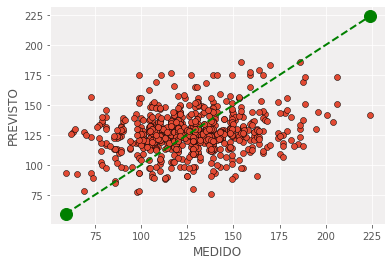

RMSE: 24.085357438910634


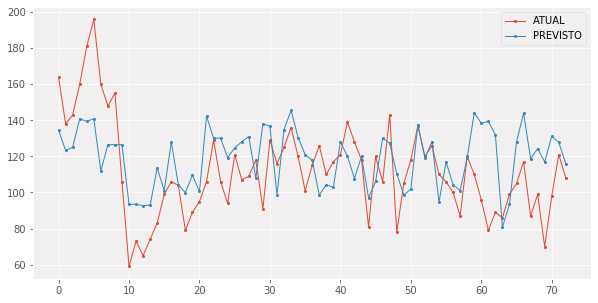

Weight,Feature
0.2359 ± 0.1156,PRECIPITACAO
0.1750 ± 0.0896,VESPERA_DATA_FESTIVA
0.1331 ± 0.2230,TEMPERATURA
0.1205 ± 0.0778,UMIDADE
0.1012 ± 0.0438,BAIXA_TEMPORADA
0.0887 ± 0.0292,ALTA_TEMPORADA
0.0811 ± 0.0764,POS_DATA_FESTIVA
0.0222 ± 0.0598,DATA_NAO_FESTIVA
0.0215 ± 0.0118,FDS
0.0066 ± 0.0040,DS


In [47]:
# imports
from sklearn.ensemble import GradientBoostingRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
gb = GradientBoostingRegressor(random_state=0, n_estimators=15, max_depth=20, min_samples_leaf=1)

# cross validation
scores = cross_val_score(gb, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(gb, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

# plot
df_comparison = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df_comparison.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(gb, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

RMSE (cross validation): 25.016729732760012


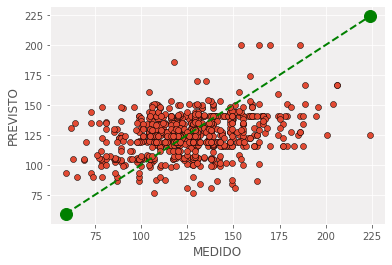

RMSE: 23.039375551049165


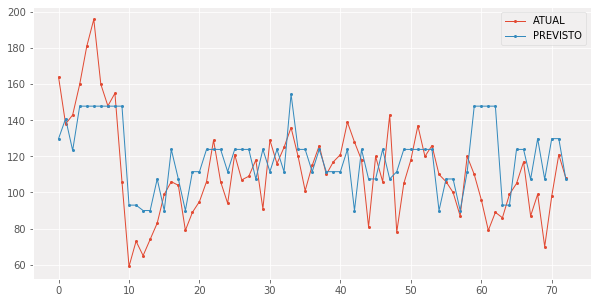

Weight,Feature
0.4901 ± 0.1257,VESPERA_DATA_FESTIVA
0.3091 ± 0.0632,ALTA_TEMPORADA
0.2470 ± 0.2121,PRECIPITACAO
0.1449 ± 0.0267,UMIDADE
0.1243 ± 0.1258,TEMPERATURA
0.0446 ± 0.0486,POS_DATA_FESTIVA
0 ± 0.0000,QTD_CONCORRENTES
0 ± 0.0000,BAIXA_TEMPORADA
0 ± 0.0000,NAO_FERIADO
0 ± 0.0000,DATA_NAO_FESTIVA


In [48]:
# imports
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
tree = DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse', max_depth=600,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=23,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# cross validation
scores = cross_val_score(tree, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(tree, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

# plot
df_comparison = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df_comparison.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(tree, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

RMSE (cross validation): 23.74669414082238


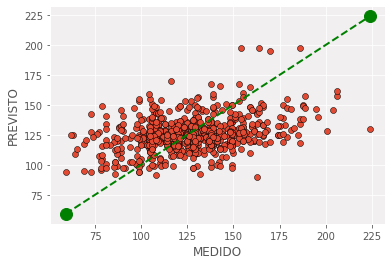

RMSE: 24.594771026570907


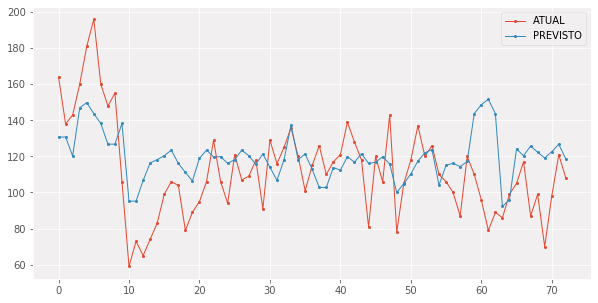

Weight,Feature
0.1976 ± 0.0352,VESPERA_DATA_FESTIVA
0.0615 ± 0.0579,PRECIPITACAO
0.0438 ± 0.0516,UMIDADE
0.0272 ± 0.0245,BAIXA_TEMPORADA
0.0255 ± 0.0541,POS_DATA_FESTIVA
0.0200 ± 0.0226,ALTA_TEMPORADA
0.0116 ± 0.0531,TEMPERATURA
0.0037 ± 0.0107,FDS
0.0027 ± 0.0209,DATA_NAO_FESTIVA
0.0017 ± 0.0068,DS


In [49]:
# imports
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
ada = AdaBoostRegressor(learning_rate=0.1, 
                        loss='exponential', 
                        n_estimators=60, 
                        random_state=0, 
                        base_estimator=DecisionTreeRegressor(ccp_alpha=0.1,
                        criterion='friedman_mse',
                        max_depth=200,
                        max_features=None,
                        max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        min_impurity_split=None,
                        min_samples_leaf=1,
                        min_samples_split=23,
                        min_weight_fraction_leaf=0.0,
                        presort='deprecated',
                        random_state=None,
                        splitter='best'))

# cross validation
scores = cross_val_score(ada, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(ada, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

# plot
df1 = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(ada, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

RMSE (cross validation): 27.227284109088913


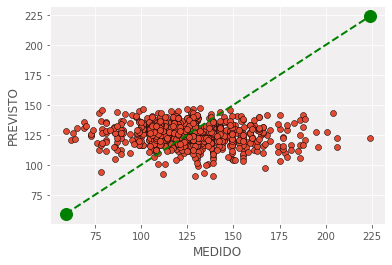

RMSE: 23.936069032539724


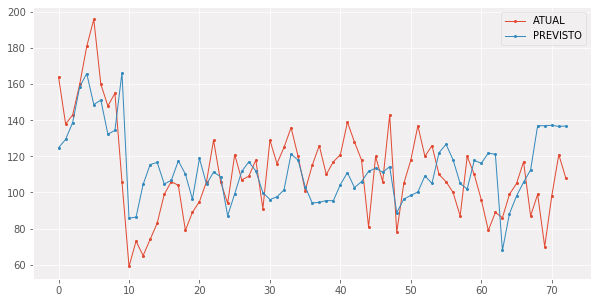

Weight,Feature
0.3860 ± 0.1375,VESPERA_DATA_FESTIVA
0.2752 ± 0.1975,DATA_NAO_FESTIVA
0.1901 ± 0.1151,BAIXA_TEMPORADA
0.1080 ± 0.2004,POS_DATA_FESTIVA
0.1040 ± 0.2079,ALTA_TEMPORADA
0.0273 ± 0.1373,PRECIPITACAO
0.0189 ± 0.0750,FDS
0.0138 ± 0.0413,UMIDADE
0 ± 0.0000,NAO_FERIADO
0 ± 0.0000,DATA_FESTIVA


In [50]:
# imports 
from sklearn.neural_network import MLPRegressor
plt.rcParams['axes.facecolor'] = '#F1EFEF'

# model
nn = MLPRegressor(random_state=0, hidden_layer_sizes=41, max_iter=789, early_stopping=True)

# cross validation
scores = cross_val_score(nn, X, y, scoring='neg_mean_squared_error', cv=5)
predicted = cross_val_predict(nn, X, y, cv=5)
print(f'RMSE (cross validation): {np.sqrt(np.abs(scores)).mean()}')

# plot
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'go--', linewidth=2, markersize=12)
ax.set_xlabel('ATUAL')
ax.set_ylabel('PREVISTO')
plt.show()

# manual training
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

# plot
df1 = pd.DataFrame({'ATUAL': pd.DataFrame(y_test).values.flatten(), 'PREVISTO': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=2, style="-o")
plt.show()

# permutation
perm = PermutationImportance(nn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.values.tolist())

(655, 1, 13) (655, 1) (73, 1, 13) (73, 1)
Epoch 1/100
10/10 - 0s - loss: 17084.8652 - val_loss: 13220.3008
Epoch 2/100
10/10 - 0s - loss: 17051.4883 - val_loss: 13191.7686
Epoch 3/100
10/10 - 0s - loss: 17017.9297 - val_loss: 13154.6133
Epoch 4/100
10/10 - 0s - loss: 16974.7539 - val_loss: 13104.8174
Epoch 5/100
10/10 - 0s - loss: 16918.6094 - val_loss: 13037.0684
Epoch 6/100
10/10 - 0s - loss: 16839.4082 - val_loss: 12945.0322
Epoch 7/100
10/10 - 0s - loss: 16732.1074 - val_loss: 12822.3711
Epoch 8/100
10/10 - 0s - loss: 16589.3613 - val_loss: 12664.8096
Epoch 9/100
10/10 - 0s - loss: 16403.7363 - val_loss: 12467.4512
Epoch 10/100
10/10 - 0s - loss: 16163.9111 - val_loss: 12227.4551
Epoch 11/100
10/10 - 0s - loss: 15872.3682 - val_loss: 11945.9287
Epoch 12/100
10/10 - 0s - loss: 15517.4199 - val_loss: 11623.5889
Epoch 13/100
10/10 - 0s - loss: 15113.6201 - val_loss: 11265.2451
Epoch 14/100
10/10 - 0s - loss: 14653.6445 - val_loss: 10876.9854
Epoch 15/100
10/10 - 0s - loss: 14136.7119 

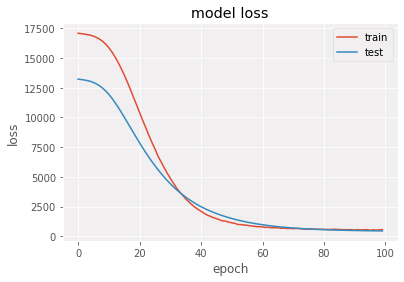

Test RMSE: 9.644


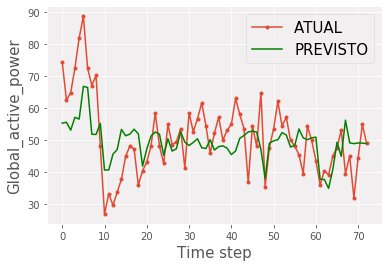

In [51]:
# imports
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import cross_val_score # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## Deep-learing imports
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

plt.rcParams['axes.facecolor'] = '#F1EFEF'

# reshape input to be 3D as expected by LSTMs [samples, timesteps, features].
train_X = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
test_X = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
train_y = y_train.reshape((pd.DataFrame(y_train).shape[0], -1))
test_y = y_test.reshape((pd.DataFrame(y_test).shape[0], -1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

# create model
model = Sequential()
model.add(LSTM(600, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], train_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# plot
aa=[x for x in range(inv_yhat.size)]
plt.plot(aa, inv_y, marker='.', label="ATUAL")
plt.plot(aa, inv_yhat, 'r', color='green', label="PREVISTO")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [52]:
# TCC Talk

# Roteiro
# - Falar do EDA
# - Falar do onehotencoding
# - Falar do permutation importance
# - Falar do Randomized Search
# - Mostrar o excel comparativo

# Perguntas
# - Sabe por que o meu correlation nao está funcionando?
# - O que sugeriria de proximo passo?
# - Alguma sugestão de como aumentar a perfomance?